In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1500 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names

(32, 256, 256, 3)
[1 2 0 2 2 0 1 0 2 1 2 2 1 0 2 2 0 0 2 1 2 1 0 1 2 2 1 2 0 0 1 0]


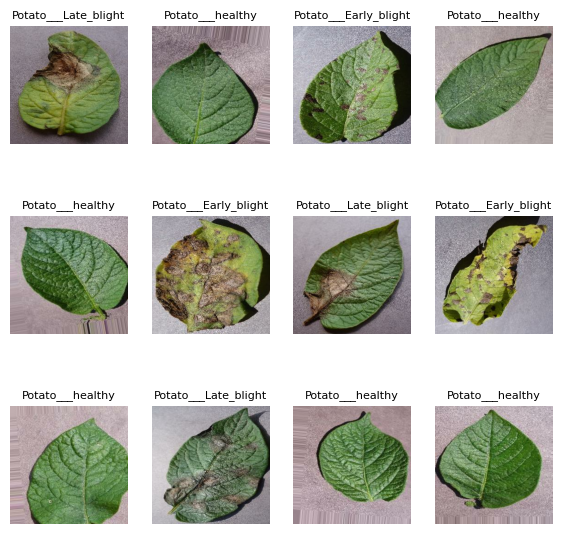

In [5]:
plt.figure(figsize=(7,7))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]],fontdict={'fontsize': 8})
        plt.axis("off")
                   


In [6]:
def get_dataset_partition(ds,train_split=0.8 , test_split=0.1 , val_split=0.1, shuffle=True , shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
        
    return train_ds, val_ds,test_ds

In [7]:
train_ds, val_ds,test_ds=get_dataset_partition(dataset)

In [8]:
print("train_ds",len(train_ds))
print("val_ds",len(val_ds))
print("test_ds",len(test_ds))


train_ds 37
val_ds 4
test_ds 6


In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
for image_batch , labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.70980394 0.7372549  0.8       ]
  [0.70980394 0.7372549  0.8       ]
  [0.7137255  0.7411765  0.8039216 ]
  ...
  [0.7372549  0.74509805 0.79607844]
  [0.5176471  0.5254902  0.5764706 ]
  [0.78039217 0.7882353  0.8392157 ]]

 [[0.70980394 0.7372549  0.8       ]
  [0.70980394 0.7372549  0.8       ]
  [0.7137255  0.7411765  0.8039216 ]
  ...
  [0.41568628 0.42352942 0.4745098 ]
  [0.48235294 0.49019608 0.5411765 ]
  [0.58431375 0.5921569  0.6431373 ]]

 [[0.70980394 0.7372549  0.8       ]
  [0.70980394 0.7372549  0.8       ]
  [0.70980394 0.7372549  0.8       ]
  ...
  [0.5137255  0.52156866 0.57254905]
  [0.93333334 0.9411765  0.99215686]
  [0.5803922  0.5882353  0.6392157 ]]

 ...

 [[0.57254905 0.58431375 0.6509804 ]
  [0.5764706  0.5882353  0.654902  ]
  [0.58431375 0.59607846 0.6627451 ]
  ...
  [0.34901962 0.35686275 0.40392157]
  [0.4117647  0.41960785 0.46666667]
  [0.53333336 0.5411765  0.5882353 ]]

 [[0.5647059  0.5764706  0.6431373 ]
  [0.57254905 0.58431375 0.6509804 ]


In [11]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [13]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [33]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [34]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=early_stopping)

Epoch 1/50
37/37 [==============================] - 89s 2s/step - loss: 0.1823 - accuracy: 0.9254 - val_loss: 0.2664 - val_accuracy: 0.9141
Epoch 2/50
37/37 [==============================] - 89s 2s/step - loss: 0.1258 - accuracy: 0.9508 - val_loss: 0.2343 - val_accuracy: 0.9141
Epoch 3/50
37/37 [==============================] - 91s 2s/step - loss: 0.1462 - accuracy: 0.9483 - val_loss: 0.5467 - val_accuracy: 0.8359
Epoch 3: early stopping


In [18]:
model.evaluate(test_ds)

6/6 [==============================] - 6s 705ms/step - loss: 0.2215 - accuracy: 0.9115


[0.2214752584695816, 0.9114583134651184]

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

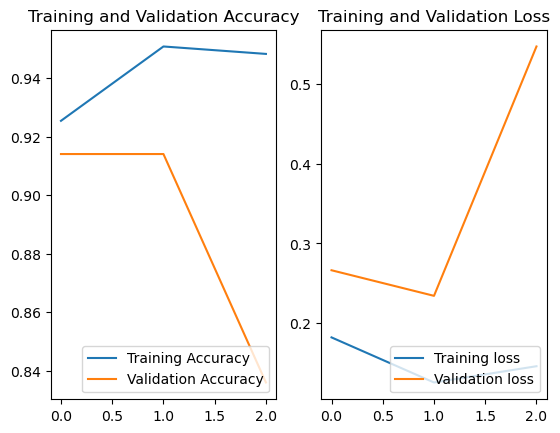

In [40]:
plt.subplot(1,2,1)
plt.plot(range(3),acc,label="Training Accuracy")
plt.plot(range(3),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(3),loss,label="Training loss")
plt.plot(range(3),val_loss,label="Validation loss")
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()



In [41]:
import numpy as np

First image to predict
Actual Label: Potato___healthy
1/1 [==============================] - 1s 515ms/step
Predicted Label: Potato___healthy


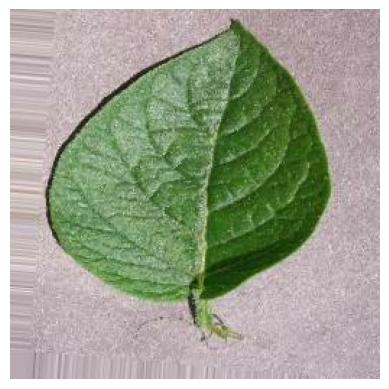

In [44]:
for image_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual Label:",class_name[labels_batch[0].numpy()])
    
    batch_prediction=model.predict(image_batch)
    print("Predicted Label:",class_name[np.argmax(batch_prediction[0])])

In [45]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    prediction=model.predict(img_array)
    
    predicted_class=class_name[np.argmax(prediction[0])]
    confidence=round(100 * (np.max(prediction[0])),2)
    return predicted_class ,confidence

1/1 [==============================] - 0s 47ms/step


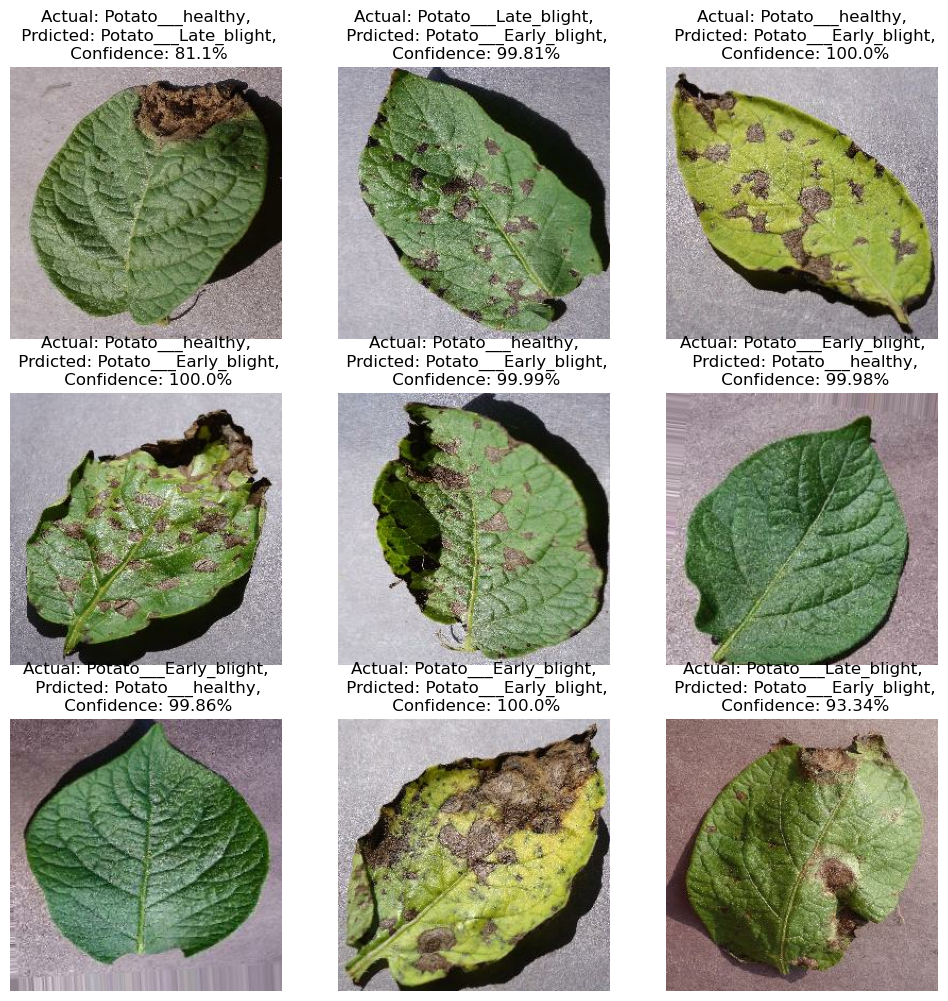

In [47]:
plt.figure(figsize=(12,12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        
        actual_class = class_name[labels_batch[i]]
        plt.title(f"Actual: {actual_class},\n Prdicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [49]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
